In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\기획재정부_월별 수입징수 상황 정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209184329.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209185325.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209185330.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209185338.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209185225.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209185217.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209185203.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209185303.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 수입징수 상황 정보\\월별 수입징수상황_20230209185311.csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공

In [4]:
df = pd.DataFrame()
for f in files:
    tmp_df = pd.read_csv(f,encoding='utf-8')
    df = pd.concat([df,tmp_df])
df.reset_index(inplace=True,drop=True)
df.head()

,No.,회계년도,회계월,소관,소관명,회계,회계명,수입관코드,수입관명,수입항코드,...,수입목코드,수입목명,예산(원),징수결정본월금액(원),징수결정누계금액(원),수납본월금액(원),수납누계금액(원),불납결손본월금액(원),불납결손누계금액(원),미수납누계금액(원)
0,1,2022,10,4,국가정보원,110,일반회계,11,재산수입,54,...,547,기타재산이자외수입,"7,719,000,000","531,046,910","40,050,108,480","531,046,910","40,050,108,480",0,0,0
1,2,2022,10,5,감사원,110,일반회계,11,재산수입,51,...,511,토지대여료,"7,000,000",0,0,0,0,0,0,0
2,3,2022,10,5,감사원,110,일반회계,11,재산수입,51,...,512,건물대여료,"19,000,000",0,0,0,0,0,0,0
3,4,2022,10,5,감사원,110,일반회계,12,경상이전수입,59,...,596,기타경상이전수입,"73,000,000","163,170","5,240,470","163,170","5,240,470",0,0,0
4,5,2022,10,5,감사원,110,일반회계,13,재화및용역판매수입,69,...,691,기타잡수입,"97,000,000","102,144,140","102,144,140","102,144,140","102,144,140",0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18636 entries, 0 to 18635
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          18636 non-null  int64 
 1   회계년도         18636 non-null  int64 
 2   회계월          18636 non-null  int64 
 3   소관           18636 non-null  int64 
 4   소관명          18636 non-null  object
 5   회계           18636 non-null  object
 6   회계명          18636 non-null  object
 7   수입관코드        18636 non-null  int64 
 8   수입관명         18636 non-null  object
 9   수입항코드        18636 non-null  int64 
 10  수입항명         18636 non-null  object
 11  수입목코드        18636 non-null  int64 
 12  수입목명         18636 non-null  object
 13  예산(원)        18636 non-null  object
 14  징수결정본월금액(원)  18636 non-null  object
 15  징수결정누계금액(원)  18636 non-null  object
 16  수납본월금액(원)    18636 non-null  object
 17  수납누계금액(원)    18636 non-null  object
 18  불납결손본월금액(원)  18636 non-null  object
 19  불납결손누계금액(원)  18636 non-nu

In [6]:
df.describe()


,No.,회계년도,회계월,소관,수입관코드,수입항코드,수입목코드
count,18636.000000,18636.0,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000
mean,932.864456,2022.0,5.568953,70.320294,16.975639,64.377388,646.740502
std,538.956603,0.0,2.864964,40.640181,10.358321,15.588636,155.627984
min,1.000000,2022.0,1.000000,4.000000,1.000000,11.000000,111.000000
25%,466.000000,2022.0,3.000000,31.000000,11.000000,54.000000,546.000000
50%,932.000000,2022.0,6.000000,75.000000,12.000000,59.000000,596.000000
75%,1398.000000,2022.0,8.000000,95.000000,15.000000,72.000000,721.000000
max,1922.000000,2022.0,10.000000,167.000000,40.000000,96.000000,962.000000


In [7]:
df.describe(include=np.object)

,소관명,회계,회계명,수입관명,수입항명,수입목명,예산(원),징수결정본월금액(원),징수결정누계금액(원),수납본월금액(원),수납누계금액(원),불납결손본월금액(원),불납결손누계금액(원),미수납누계금액(원)
count,18636,18636,18636,18636,18636,18636,18636,18636,18636,18636,18636,18636,18636,18636
unique,58,101,101,19,53,123,1174,8161,8374,7996,8264,432,434,5140
top,보건복지부,110,일반회계,경상이전수입,기타이자수입및재산수입,기타경상이전수입,0,0,0,0,0,0,0,0
freq,1307,6437,6437,5526,2659,1740,3166,10116,6222,10211,7195,18203,18011,11655


## 전처리

In [8]:
df.drop(['회계','소관','수입관코드','수입항코드','수입목코드'],axis=1,inplace=True)

In [9]:
cols = ['예산(원)','징수결정본월금액(원)','징수결정누계금액(원)','수납본월금액(원)','수납누계금액(원)','불납결손본월금액(원)','불납결손누계금액(원)','미수납누계금액(원)']
for c in cols:
    df[c] = df[c].apply(lambda x : "".join(re.findall(r'([^,]+)',x)))

In [10]:
for c in cols:
    df = df.astype({c:'int64'})

In [11]:
df.describe()

,No.,회계년도,회계월,예산(원),징수결정본월금액(원),징수결정누계금액(원),수납본월금액(원),수납누계금액(원),불납결손본월금액(원),불납결손누계금액(원),미수납누계금액(원)
count,18636.000000,18636.0,18636.000000,1.863600e+04,1.863600e+04,1.863600e+04,1.863600e+04,1.863600e+04,1.863600e+04,1.863600e+04,1.863600e+04
mean,932.864456,2022.0,5.568953,7.192355e+11,4.937449e+10,3.091356e+11,4.515552e+10,2.674611e+11,1.077323e+08,5.090443e+08,4.116545e+10
std,538.956603,0.0,2.864964,6.359029e+12,8.066288e+11,3.637813e+12,7.333782e+11,3.440309e+12,3.759640e+09,2.091398e+10,9.209105e+11
min,1.000000,2022.0,1.000000,-3.120650e+11,-1.827895e+13,-3.207710e+10,-1.815525e+13,-3.214933e+10,-2.454242e+08,-4.000000e+05,0.000000e+00
25%,466.000000,2022.0,3.000000,1.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,932.000000,2022.0,6.000000,8.460000e+08,0.000000e+00,1.899120e+07,0.000000e+00,3.455980e+06,0.000000e+00,0.000000e+00,0.000000e+00
75%,1398.000000,2022.0,8.000000,3.000000e+10,4.320334e+07,1.698276e+09,3.529589e+07,7.449107e+08,0.000000e+00,0.000000e+00,2.793438e+07
max,1922.000000,2022.0,10.000000,1.773172e+14,4.270524e+13,1.477178e+14,2.763422e+13,1.461966e+14,2.222210e+11,1.519774e+12,4.181926e+13


In [12]:
df.describe(include=np.object)

,소관명,회계명,수입관명,수입항명,수입목명
count,18636,18636,18636,18636,18636
unique,58,101,19,53,123
top,보건복지부,일반회계,경상이전수입,기타이자수입및재산수입,기타경상이전수입
freq,1307,6437,5526,2659,1740


## 시각화

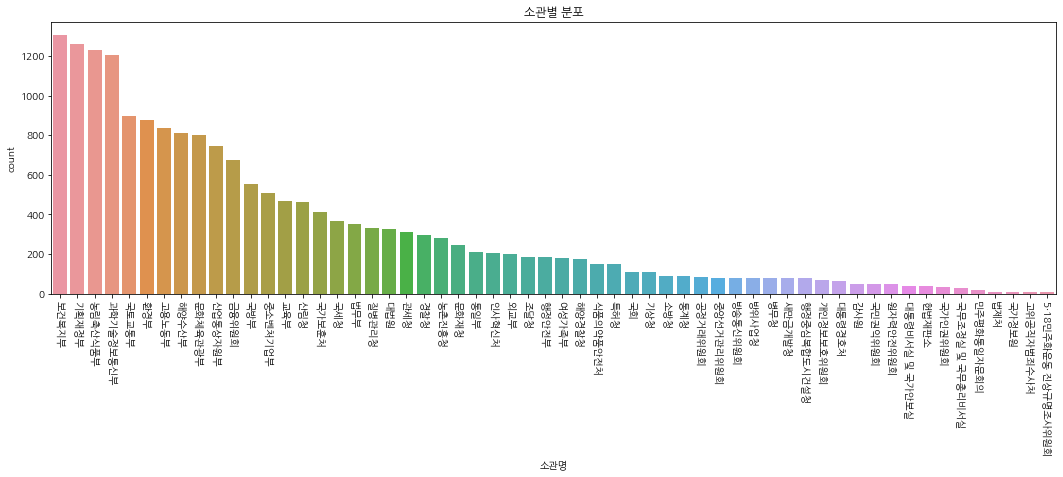

In [25]:
fig,ax = plt.subplots(1,1,figsize=(18,5))
sub_df = df.groupby('소관명',as_index=False)['No.'].count().sort_values('No.',ascending=False)
sns.barplot(data=sub_df,x='소관명',y='No.').set(title='소관별 분포',ylabel='count')
g=ax.set_xticklabels(ax.get_xticklabels(),rotation=-90)

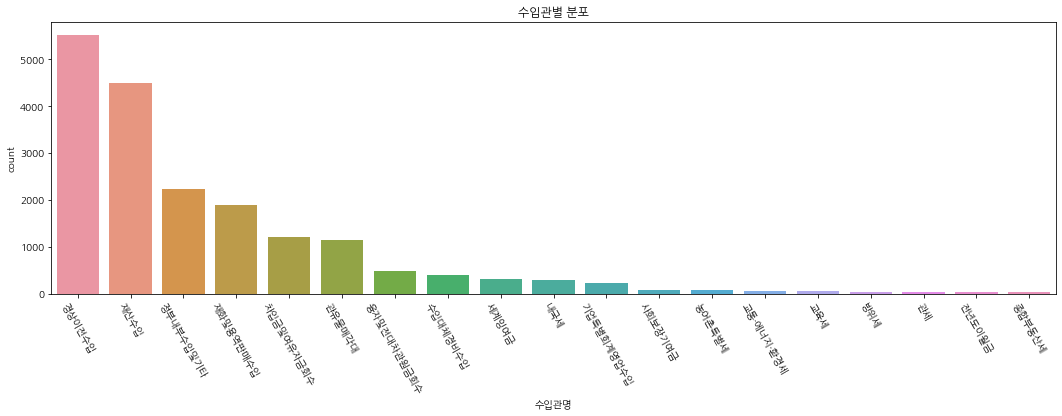

In [15]:
fig,ax = plt.subplots(1,1,figsize=(18,5))
sub_df = df.groupby('수입관명',as_index=False)['No.'].count().sort_values('No.',ascending=False)
sns.barplot(data=sub_df,x='수입관명',y='No.').set(title='수입관별 분포',ylabel='count')
g=ax.set_xticklabels(ax.get_xticklabels(),rotation=-60)

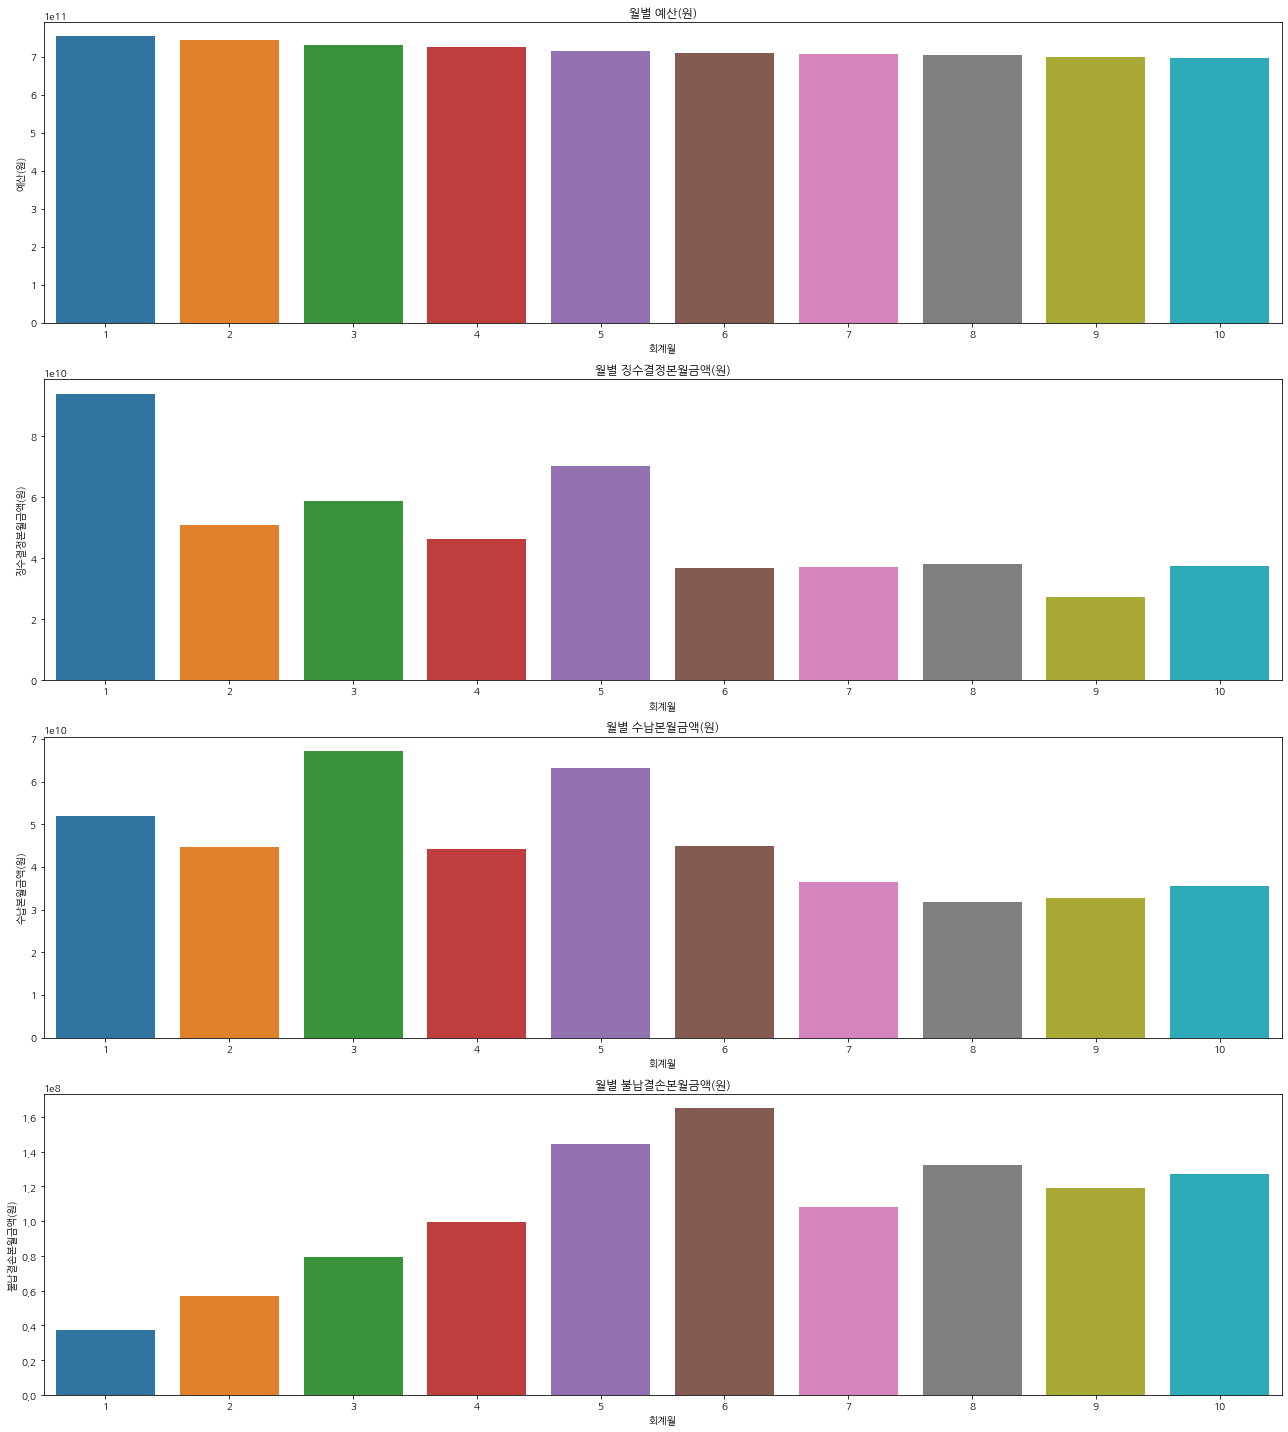

In [14]:
money_cols = ['예산(원)','징수결정본월금액(원)','수납본월금액(원)','불납결손본월금액(원)']
fig,axes = plt.subplots(4,1,figsize=(18,20))
for i,c in enumerate(money_cols):
    sub_df = df.groupby('회계월',as_index=False)[c].mean().sort_values('회계월')
    sns.barplot(data=sub_df,x='회계월',y=c,ax=axes[i]).set(title=f'월별 {c}')
plt.tight_layout()

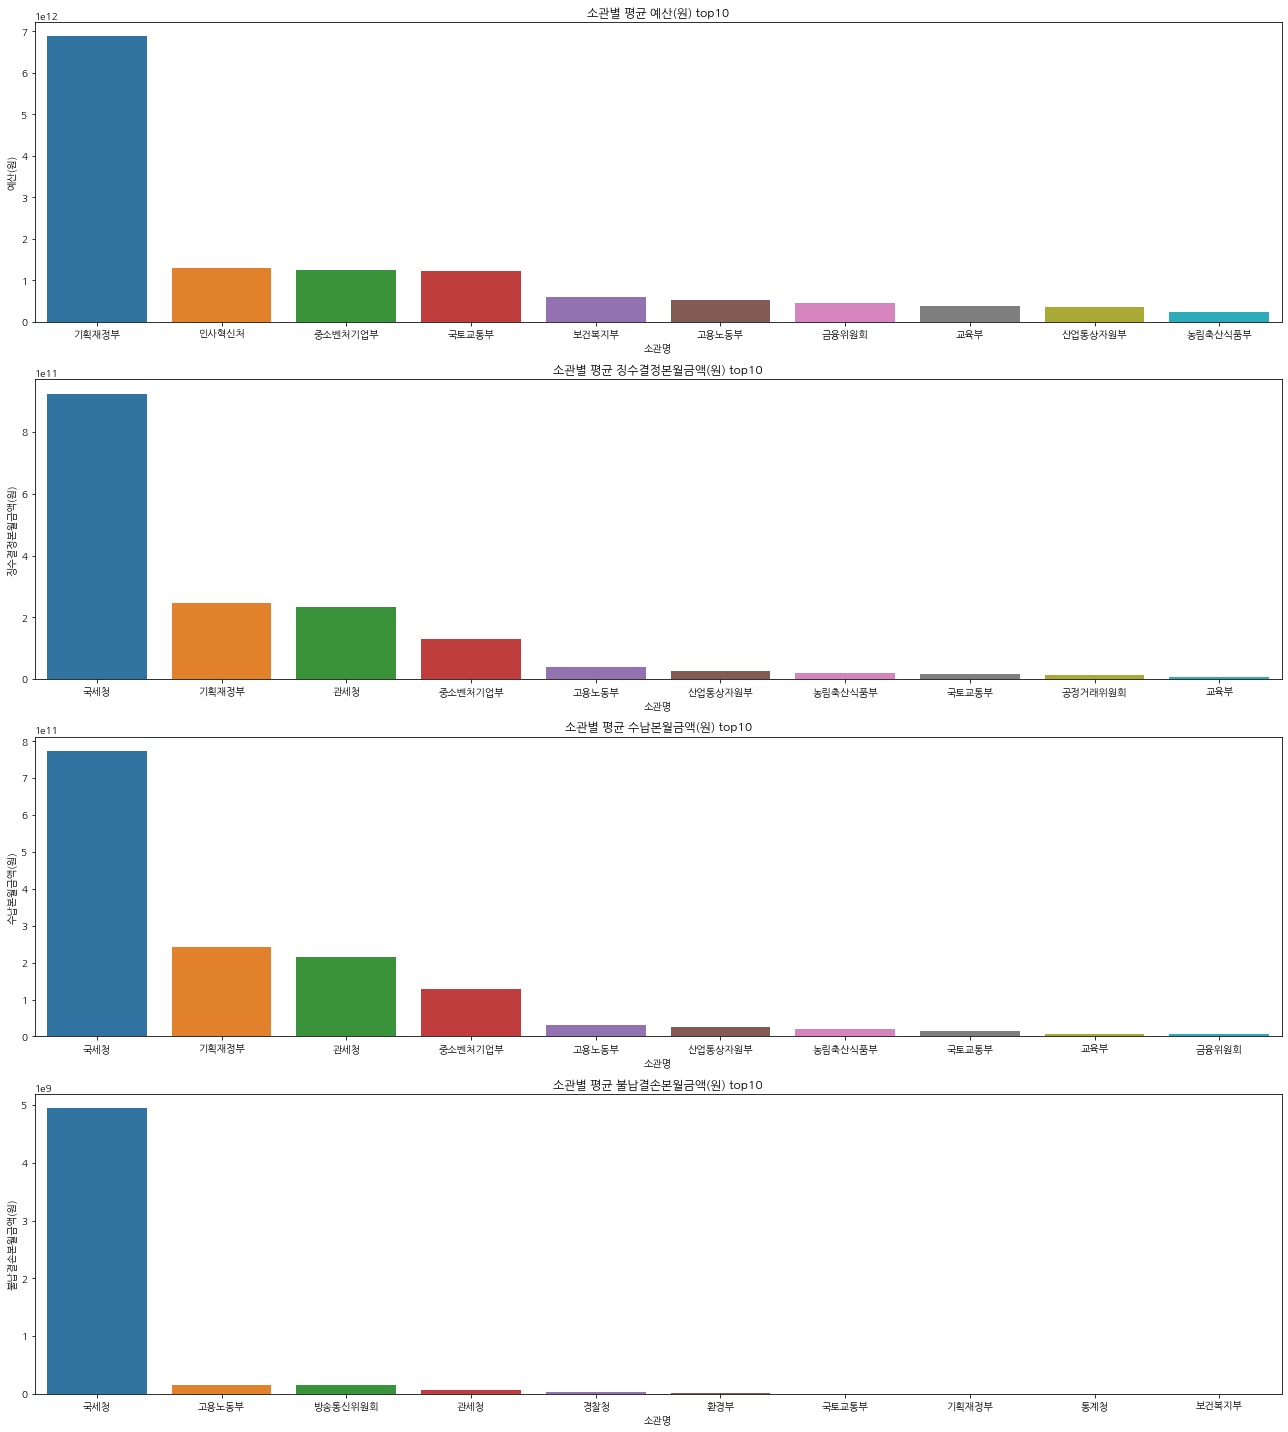

In [23]:
fig,axes = plt.subplots(4,1,figsize=(18,20))
for i,c in enumerate(money_cols):
    sub_df = df.groupby('소관명',as_index=False)[c].mean().sort_values(c,ascending=False)
    sns.barplot(data=sub_df.head(10),x='소관명',y=c,ax=axes[i]).set(title=f'소관별 평균 {c} top10')
plt.tight_layout()

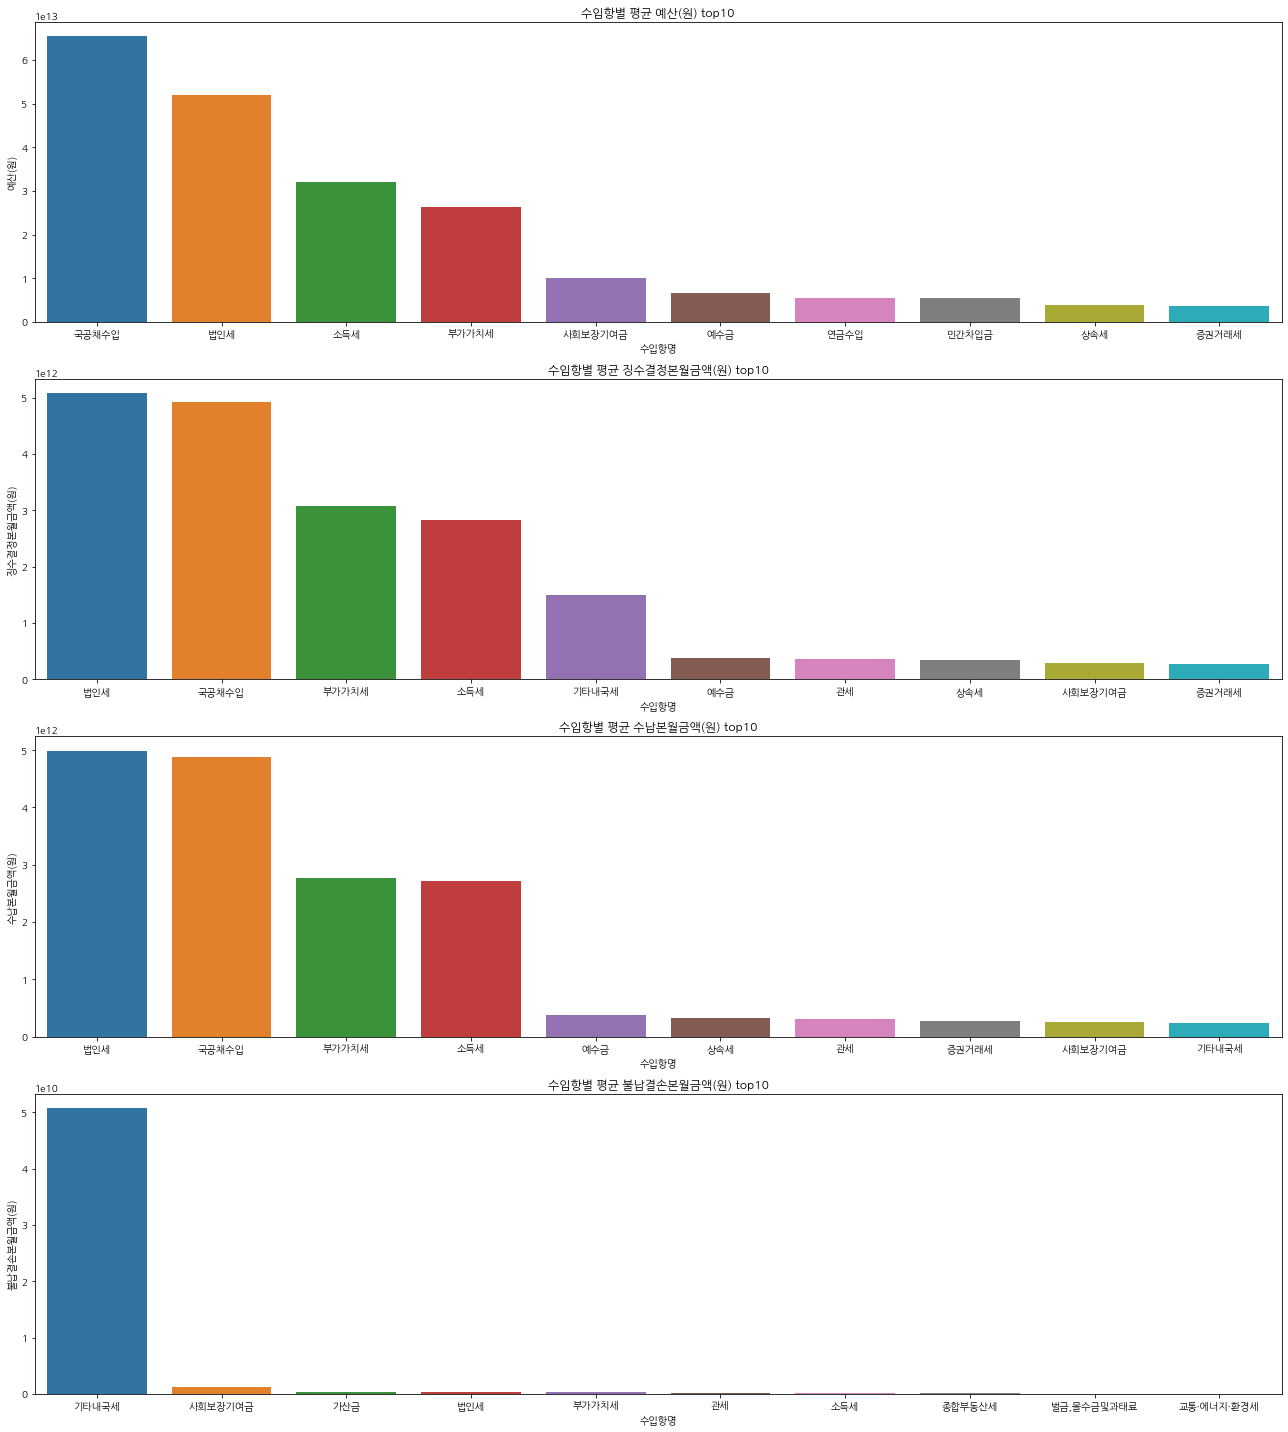

In [22]:
fig,axes = plt.subplots(4,1,figsize=(18,20))
for i,c in enumerate(money_cols):
    sub_df = df.groupby('수입항명',as_index=False)[c].mean().sort_values(c,ascending=False)
    sns.barplot(data=sub_df.head(10),x='수입항명',y=c,ax=axes[i]).set(title=f'수입항별 평균 {c} top10')
plt.tight_layout()